In [1]:
import tensorflow as tf
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


2024-11-05 20:11:50.977423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-05 20:11:51.116767: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-05 20:11:51.146880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 20:11:51.325286: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-05 20:11:52.911210: W tensorflow/compiler/tf2

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


I0000 00:00:1730817715.574147    9084 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730817715.861307    9084 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730817715.861511    9084 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [3]:
from keras.api.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
from keras.api.models import Sequential
from keras.api.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D

model = Sequential([

	Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
	AveragePooling2D((2, 2), padding="same"),

	Conv2D(64, (3, 3), activation='relu', padding="same"),
	MaxPooling2D((2, 2), padding="same"),

	Conv2D(64, (3, 3), activation='relu', padding="same"),
	Flatten(),

	Dense(64, activation='relu'),
	Dense(10, activation='softmax'),

])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/aditya/Desktop/Aditya/Tranberg USB/USB Drive/Aditya new/Aditya/CSM A/III Year/I Semester/PS_Cyber_Detective/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730817719.647923    9084 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730817719.648138    9084 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Accuracy: {test_accuracy:.2f}')


Epoch 1/5


I0000 00:00:1730817722.221675   19278 service.cc:146] XLA service 0x7e9a98004fc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730817722.221696   19278 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-11-05 20:12:02.253384: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-05 20:12:02.447394: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 27/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1090 - loss: 2.2899

2024-11-05 20:12:05.740127: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1730817725.751418   19278 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3533 - loss: 1.7580

2024-11-05 20:12:12.041994: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3534 - loss: 1.7577 - val_accuracy: 0.5617 - val_loss: 1.2444
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5944 - loss: 1.1407 - val_accuracy: 0.6366 - val_loss: 1.0312
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6684 - loss: 0.9448 - val_accuracy: 0.6728 - val_loss: 0.9256
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7174 - loss: 0.8127 - val_accuracy: 0.6945 - val_loss: 0.8728
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7405 - loss: 0.7391 - val_accuracy: 0.7092 - val_loss: 0.8364
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 0.8126
Test Accuracy: 0.71


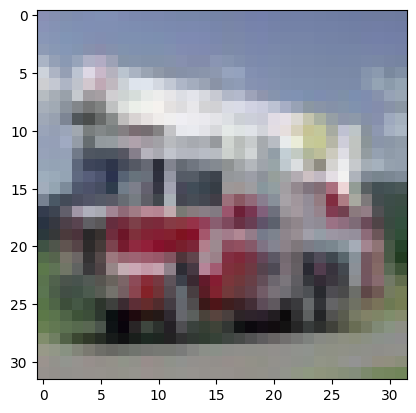

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Predicted label: 9, actual: 9


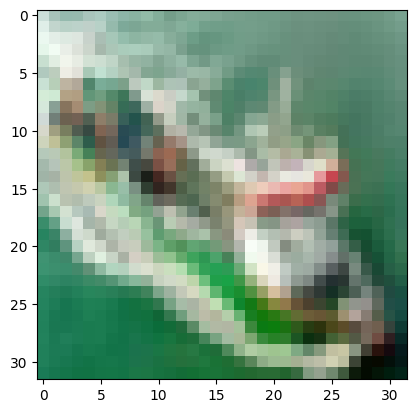

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted label: 8, actual: 8


In [7]:
from matplotlib import pyplot as plt
import numpy as np
from keras.api.preprocessing import image

def predict_image(idx):
    img = x_test[idx][np.newaxis, :, :, :]
    plt.imshow(x_test[idx])
    plt.show()
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)
    actual_class = np.argmax(y_test[idx])
    return predicted_class, actual_class


predicted_label = predict_image(89)
print(f'Predicted label: {predicted_label[0][0]}, actual: {predicted_label[1]}')

predicted_label = predict_image(15)
print(f'Predicted label: {predicted_label[0][0]}, actual: {predicted_label[1]}')


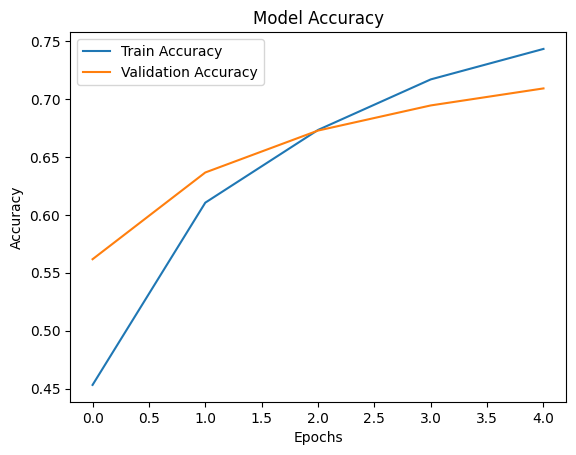

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
exit(0)

: 